In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import stats
font = {'family' : 'sans-serif',
        'weight' : 'light',
        'size'   : 6}

mpl.rc('font', **font)

In [3]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

### Nucleosome occupancies from iNPS data

All heart/brain

```bash 

echo "heart_nucocc_all_fC" > all_nuc_area_heart.txt ; cat ConsensusNucleosome_iNPS_Heart_WT_noMT.bed | awk '{print $7}'  >> all_nuc_area_heart.txt

echo "brain_nucocc_all_fC" > all_nuc_area_brain.txt ; cat ConsensusNucleosome_iNPS_Brain_WT_noMT.bed | awk '{print $7}'  >> all_nuc_area_brain.txt
```

Nucleosomeoccupancy_tissue_5fC.csv was generated by intersecting nucleosomes from iNPs with 5fC sites of the given tissue, and reporting the area of such nucleosomes. 



In [4]:
all = pd.read_table("Nucleosomeoccupancy_tissue_5fC.csv", sep=",")
all_heart = pd.read_table("all_nuc_area_brain.txt", sep=",")
all_brain = pd.read_table("all_nuc_area_heart.txt", sep=",")

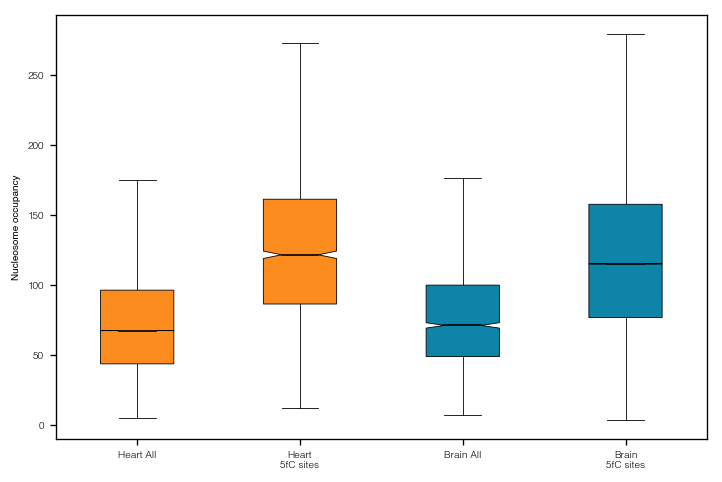

In [6]:
medianprops = dict(color='black')
boxprops = dict(linewidth=0.5)
flierprops = dict(linewidth=0.5)
whiskerprops= dict(linewidth=0.5)
capprops=dict(linewidth=0.5)
f, ax = plt.subplots(1, 1 , dpi=120)
box = ax.boxplot([all_heart,
                all["Heart_5fC"].dropna().values, 
                all["Brain_5fC"].dropna().values, 
                 all_brain],
                 1, "", patch_artist=True, 
                 boxprops=boxprops, 
                 whiskerprops=whiskerprops,
                 flierprops=flierprops,
                 capprops=capprops,
                 medianprops=medianprops)

labels = ["Heart All", "Heart\n5fC sites","Brain All", "Brain\n5fC sites"]
ax.set_xticklabels(labels)
ax.set_ylabel("Nucleosome occupancy")
colors = ['#FD8C1E', '#FD8C1E', "#0F84A9", '#0F84A9']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
f.tight_layout()


### Are the two pairs of distributions different?

Perform a Mann-Whitney U-test, two-sided.

In [7]:
stat_heart, pval_Heart = stats.mannwhitneyu(all_heart.values.flatten(), all["Heart_5fC"].dropna().values, alternative='two-sided')
stat_brain, pval_Brain = stats.mannwhitneyu(all_brain.values.flatten(), all["Brain_5fC"].dropna().values, alternative='two-sided')

In [8]:
# Print out the result
print("p-value MW U-test Heart all vs 5fC", pval_Heart)
print("p-value MW U-test Brain all vs 5fC", pval_Brain)

p-value MW U-test Heart all vs 5fC 0.0
p-value MW U-test Brain all vs 5fC 7.31794633422e-213


So yes, we can reject the null hypothesis that the two distributions are the same